In [8]:
import pandas as pd
import os
import zipfile

# Define the zip file path
zip_file_path = "/mnt/data/archive (13).zip"
extract_folder = "/mnt/data/extracted_files"

# Extract the ZIP file
with zipfile.ZipFile(r"C:\Users\mosta\Downloads\archive (13).zip", "r") as zip_ref:
    zip_ref.extractall(extract_folder)

# List all extracted files
csv_files = [f for f in os.listdir(extract_folder) if f.endswith(".csv")]

# Dictionary to store DataFrames
dfs = {}

# Read all CSV files into separate DataFrames
for file in csv_files:
    file_path = os.path.join(extract_folder, file)
    df_name = file.replace(".csv", "")  # Use file name as key
    dfs[df_name] = pd.read_csv(file_path)  # Read CSV file

# Print loaded DataFrames
print(f"Loaded {len(dfs)} CSV files: {list(dfs.keys())}")

# Example: Display first 5 rows of a specific DataFrame
print(dfs["blinkit_delivery_performance"].head())  # Change based on available file names
print(type(dfs))

Loaded 9 CSV files: ['blinkit_customers', 'blinkit_customer_feedback', 'blinkit_delivery_performance', 'blinkit_inventory', 'blinkit_inventoryNew', 'blinkit_marketing_performance', 'blinkit_orders', 'blinkit_order_items', 'blinkit_products']
     order_id  delivery_partner_id        promised_time          actual_time  \
0  1961864118                63230  2024-07-17 08:52:01  2024-07-17 08:47:01   
1  1549769649                14983  2024-05-28 13:25:29  2024-05-28 13:27:29   
2  9185164487                39859  2024-09-23 13:25:12  2024-09-23 13:29:12   
3  9644738826                61497  2023-11-24 16:34:56  2023-11-24 16:33:56   
4  5427684290                84315  2023-11-20 05:17:39  2023-11-20 05:18:39   

   delivery_time_minutes  distance_km delivery_status reasons_if_delayed  
0                   -5.0         0.96         On Time                NaN  
1                    2.0         0.98         On Time            Traffic  
2                    4.0         3.83         On Tim

In [9]:
df_feedback = dfs['blinkit_customer_feedback']
df_feedback

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20
...,...,...,...,...,...,...,...,...
4995,9024060,1669690997,62600289,3,Taste was not as expected.,Product Quality,Negative,2023-12-25
4996,4715968,8340761903,53640286,3,"Average experience, could improve.",Product Quality,Neutral,2023-11-27
4997,9621021,5936301790,87059497,4,"Average experience, could improve.",App Experience,Neutral,2024-06-21
4998,1134095,5710579377,67310893,4,"Average experience, could improve.",Delivery,Neutral,2024-06-06


In [10]:
df_feedback_pivot = df_feedback.pivot_table(index='customer_id', columns='feedback_category', values='sentiment', aggfunc=lambda x: (x == 'Negative').sum())
df_feedback_pivot

feedback_category,App Experience,Customer Service,Delivery,Product Quality
customer_id,,,,
31813,1.0,NaN,1.0,NaN
61020,0.0,NaN,0.0,NaN
119099,1.0,NaN,1.0,0.0
188838,1.0,NaN,NaN,NaN
191616,0.0,NaN,NaN,1.0
...,...,...,...,...
99734256,0.0,NaN,1.0,1.0
99772709,0.0,NaN,NaN,0.0
99784559,NaN,NaN,1.0,NaN


In [11]:
df_feedback_pivot.head()

feedback_category,App Experience,Customer Service,Delivery,Product Quality
customer_id,,,,
31813,1.0,NaN,1.0,NaN
61020,0.0,NaN,0.0,NaN
119099,1.0,NaN,1.0,0.0
188838,1.0,NaN,NaN,NaN
191616,0.0,NaN,NaN,1.0


In [12]:

df_feedback_pivot['Total_Negative'] = df_feedback_pivot.sum(axis=1)

top_10_negative = df_feedback_pivot['Total_Negative'].sort_values(ascending=False).head(10)
top_10_negative

customer_id
77869660    7.0
85074810    5.0
37691544    4.0
68703613    4.0
18113428    4.0
46185579    4.0
32054313    4.0
10562528    4.0
85518832    3.0
49617892    3.0
Name: Total_Negative, dtype: float64

In [13]:
feedback_categories = df_feedback.pivot_table(index='feedback_category', values='sentiment', aggfunc=lambda x:  (x== 'Negative').sum(), fill_value=0)
feedback_categories

,sentiment
feedback_category,
App Experience,388
Customer Service,417
Delivery,405
Product Quality,432


C:\Users\mosta\AppData\Local\Temp\ipykernel_13876\463146062.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=feedback_categories['sentiment'].values, y=feedback_categories.index, palette="coolwarm")


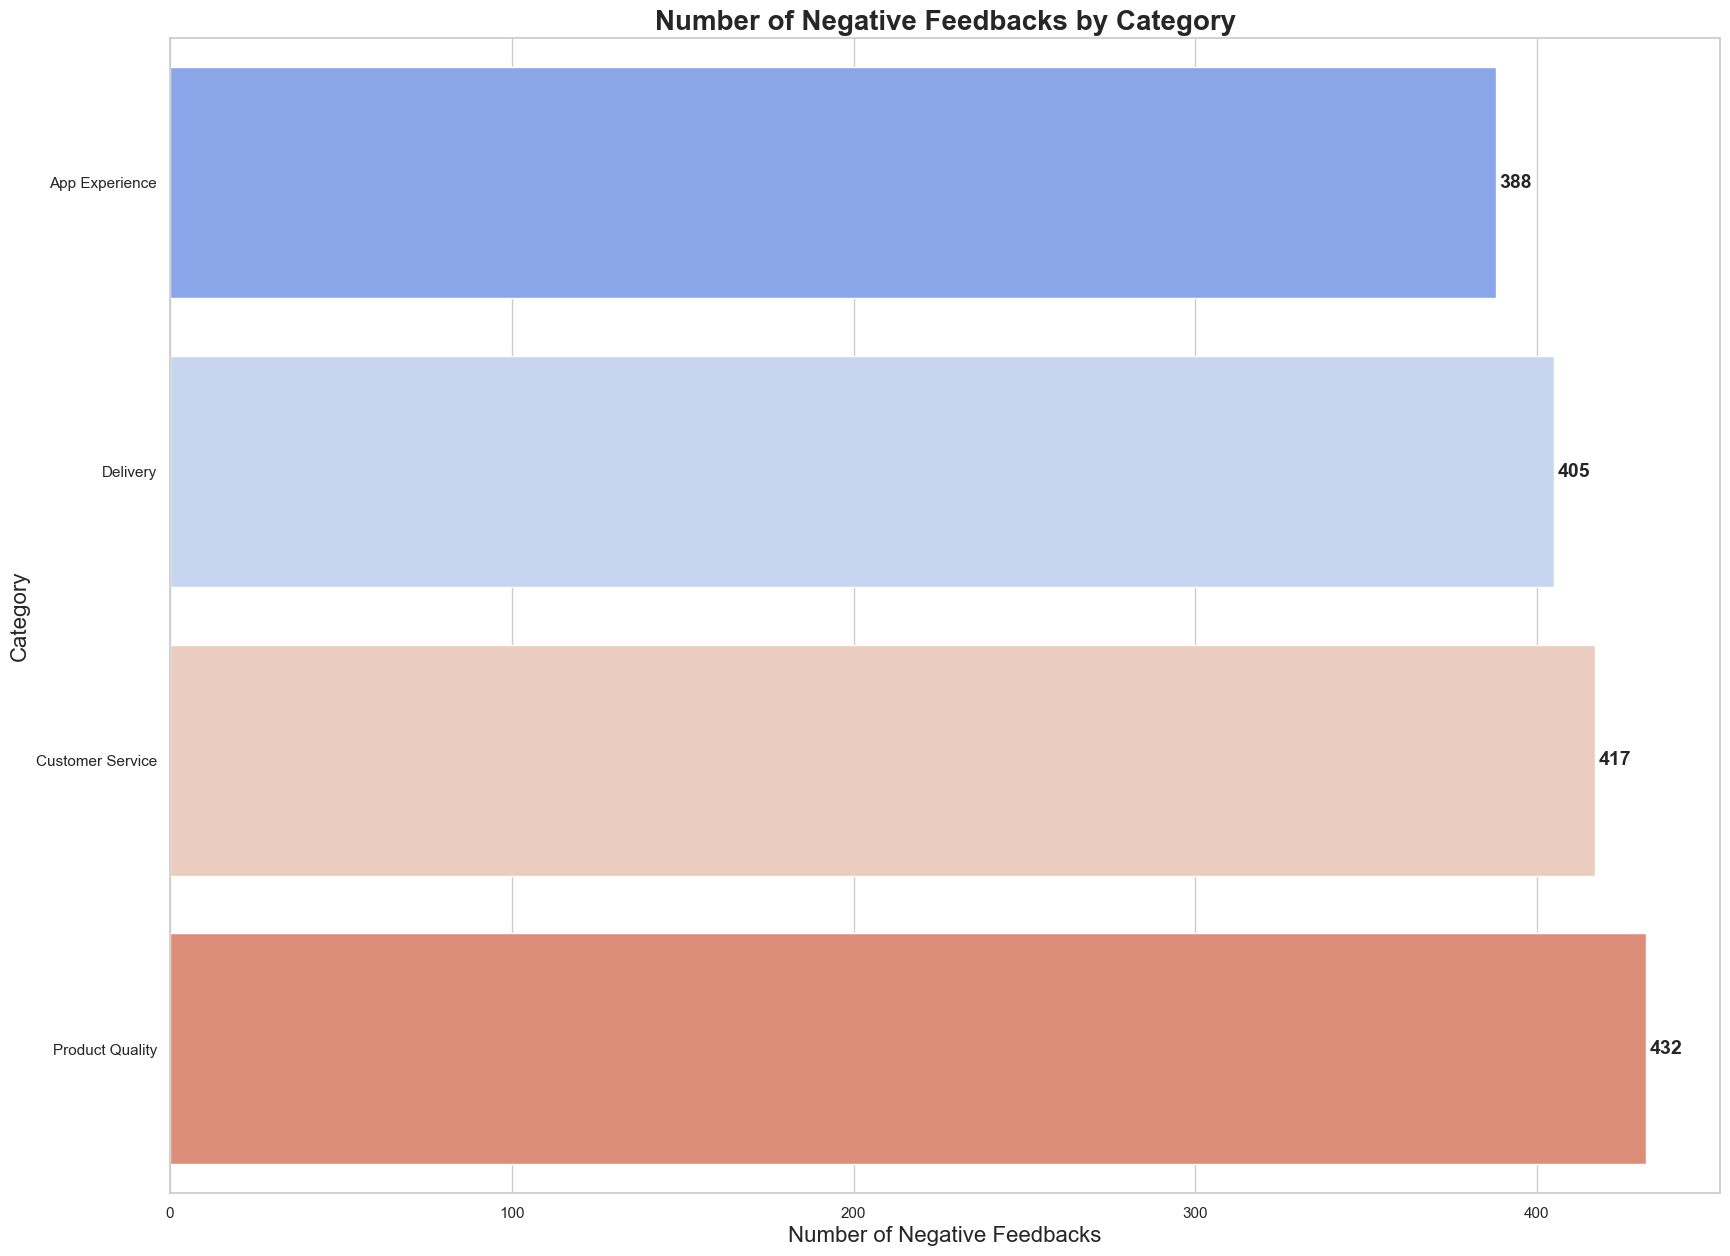

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

feedback_categories = feedback_categories.sort_values(by='sentiment', ascending=True)
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20, 15))

ax = sns.barplot(x=feedback_categories['sentiment'].values, y=feedback_categories.index, palette="coolwarm")

for i, value in enumerate(feedback_categories['sentiment'].values):
    ax.text(value + 1, i, str(value), va='center', fontsize=14, fontweight='bold')

plt.title('Number of Negative Feedbacks by Category', fontsize=20, fontweight='bold')
plt.xlabel('Number of Negative Feedbacks', fontsize=16)
plt.ylabel('Category', fontsize=16)

plt.show()
